In [47]:
import numpy as np
import pandas as pd
import matplotlib as plt


In [48]:
df=pd.read_csv('Titanic.csv')

In [49]:
df.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],inplace=True)

In [50]:
df['Sex']=df['Sex'].map({'male':0,'female':1}).astype('int64')

In [51]:
df['Sex'].dtype

dtype('int64')

In [52]:
df.fillna(df.mean(),inplace=True)

In [53]:
def z_norm(data):
    mea=data.mean()
    st=data.std()
    z=(data-mea)/st
    return z


In [54]:
df['Age']=z_norm(df['Age'])
df['Fare']=z_norm(df['Fare'])

In [55]:
x=df.iloc[:,1:]
y=df.iloc[:,:1]

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [58]:

def sig_moid(z):
    return 1/(1+np.exp(-z))
def logistic_regression(x,y,alpha,epochs):
    m,m1=np.shape(x)
    n=len(y)
    y = np.array(y).ravel()
    w=np.ones(m1)
    cost_history=[]
    bias=0;
    for i in range(epochs):
        h=np.dot(x,w)+bias
        a=sig_moid(h)
        loss=(-1/n)*np.sum(y*np.log(a)+(1-y)*np.log(1-a))
        dz=a-y
        dw=(1/n)*np.dot(x.T,dz)
        db=(1/n)*np.sum(dz)
        w=w-alpha*dw
        bias=bias-alpha*db
        if i%10==0:
            cost_history.append(loss)
    return w,bias,cost_history
def predict(x,w,bias):
    z=np.dot(x,w)+bias
    y_pred=sig_moid(z)
    y_pred_cls=[1 if i>0.5 else 0 for i in y_pred]
    return y_pred_cls



In [59]:
w,b,c=logistic_regression(x_train,y_train,0.01,1000)

In [60]:
y_pred=predict(x_test,w,b)

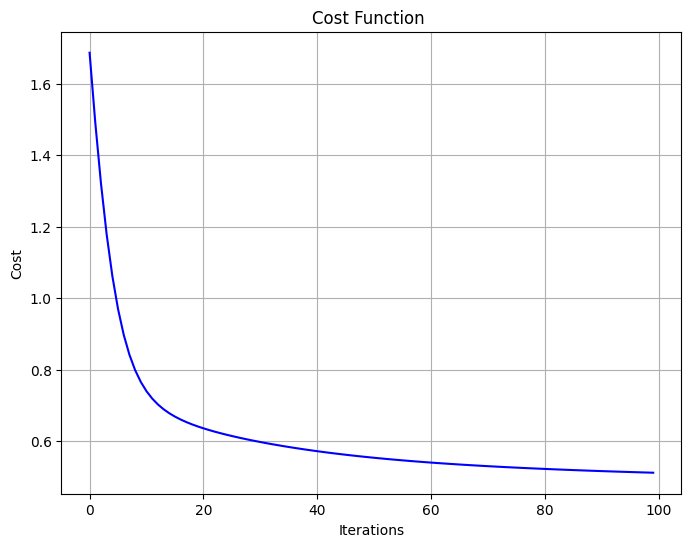

In [61]:
#plot cost function
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 6))
plt.plot(range(len(c)), c, color="blue")
plt.title("Cost Function ")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

In [62]:
#accuracy
count=0
for i in range(len(y_pred)):
    if y_pred[i]==y_test.iloc[i,0]:
        count+=1
accuracy=count/len(y_pred)
print(count)
print(len(y_pred))
print(accuracy*100)

144
179
80.44692737430168


In [63]:
#multi-class classification
df1=pd.read_csv('Iris.csv')

In [64]:
df1['Species']=df1['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}).astype('int64')

In [65]:
x1_train,x1_test,y1_train,y1_test=train_test_split(df1.iloc[:,:4],df1.iloc[:,5],test_size=0.2,random_state=0)

In [66]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_multi_class(X, y, alpha, epochs, num_classes):
    X = np.array(X)
    y = np.array(y).flatten()  
    if X.shape[0] != y.shape[0]:
        print("Number of samples in X and y must match!")
        return None,None,None
    m, n = X.shape
    weights = np.zeros((num_classes, n))
    biases = np.zeros(num_classes)
    cost_history = []

    for i in range(num_classes):
        y_c = (y == i).astype(int) 
        w = np.zeros(n)
        b = 0

        for epoch in range(epochs):
            z = np.dot(X, w) + b  
            a = sigmoid(z)  
            a = np.clip(a, 1e-10, 1 - 1e-10)  

            # Loss calculation
            loss = (-1 / m) * np.sum(y_c * np.log(a) + (1 - y_c) * np.log(1 - a))

            # Gradient calculation
            dz = a - y_c  
            dw = (1 / m) * np.dot(X.T, dz)  
            db = (1 / m) * np.sum(dz)  
            w -= alpha * dw
            b -= alpha * db

            if epoch % 10 == 0:
                cost_history.append(loss)

        weights[i] = w
        biases[i] = b

    return weights, biases, cost_history



def predict_multi_class(X, weights, biases):
    z = np.dot(X, weights.T) + biases
    probabilities = sigmoid(z)
    predictions = np.argmax(probabilities, axis=1)
    return predictions


In [67]:
w1,b1,c1=logistic_regression_multi_class(x1_train,y1_train,0.01,1000,3)

In [68]:
y_pred1=predict_multi_class(x1_test,w1,b1)
y_pred1

array([2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 2, 0])